In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [11]:
df = pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [13]:
print(df.isnull().sum())


Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


In [14]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [15]:
df_cleaned = df.dropna(subset=['Address'])


In [16]:

df_cleaned['Area'] = pd.to_numeric(df_cleaned['Area'], errors='coerce')


C:\Users\Anita\AppData\Local\Temp\ipykernel_8040\1307882010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Area'] = pd.to_numeric(df_cleaned['Area'], errors='coerce')


In [17]:
df_cleaned = df_cleaned.dropna(subset=['Area'])
df_cleaned = df_cleaned[df_cleaned['Area'] <= 1000]


In [18]:
df_cleaned.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


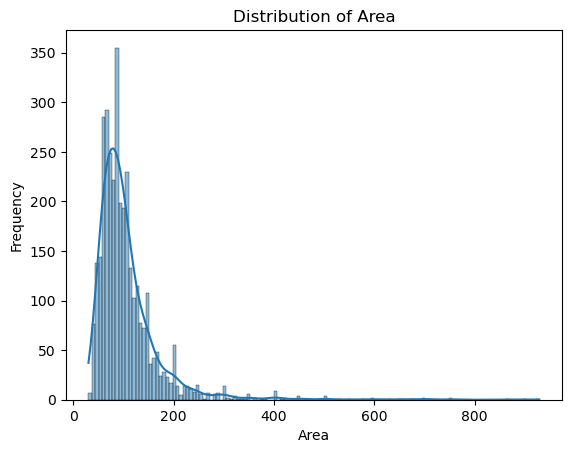

In [19]:
import seaborn as sns

sns.histplot(df_cleaned['Area'], kde=True)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Area')
plt.show()

In [20]:
numeric_df_cleaned = df_cleaned.select_dtypes(include=[np.number])


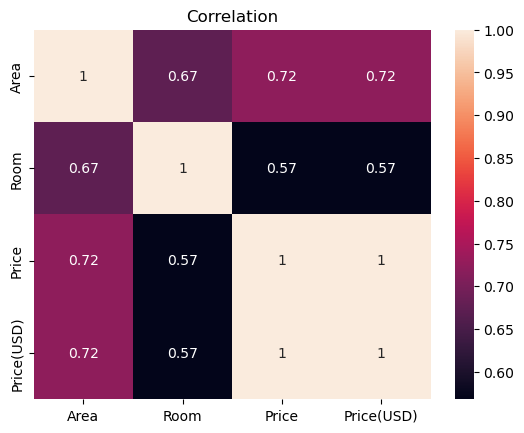

In [21]:
correlation_matrix = numeric_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation')
plt.show()

In [24]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Address'])
print(df_encoded.head())

    Area  Room  Parking  Warehouse  Elevator         Price  Price(USD)  \
0   63.0     1     True       True      True  1.850000e+09    61666.67   
1   60.0     1     True       True      True  1.850000e+09    61666.67   
2   79.0     2     True       True      True  5.500000e+08    18333.33   
3   95.0     2     True       True      True  9.025000e+08    30083.33   
4  123.0     2     True       True      True  7.000000e+09   233333.33   

   Address_Abazar  Address_Abbasabad  Address_Absard  ...  Address_Waterfall  \
0           False              False           False  ...              False   
1           False              False           False  ...              False   
2           False              False           False  ...              False   
3           False              False           False  ...              False   
4           False              False           False  ...              False   

   Address_West Ferdows Boulevard  Address_West Pars  Address_Yaftabad  \


In [32]:
X = df_encoded.drop(['Price', 'Price(USD)'], axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2760, 197) (690, 197) (2760,) (690,)


In [33]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [ 7.24095855e+07  1.68286910e+08 -7.74789177e+08  3.16665568e+07
 -2.79441414e+08  3.03590111e+09  1.37726317e+09 -3.05611564e+10
 -3.01696121e+08 -1.57700181e+09 -1.68175711e+08 -5.33984704e+08
  6.64951102e+09 -1.00681659e+09 -1.62178976e+09  1.49642771e+09
 -2.32921940e+09 -7.84201062e+08 -3.45357482e+09  6.43571723e+09
  2.00320483e+09  0.00000000e+00 -2.14841270e+09 -1.30071739e+09
 -3.92449297e+08 -4.07529180e+08 -4.19673941e+09 -1.52587891e-05
 -2.80862687e+09 -1.02509086e+09 -1.24403462e+09  5.09681552e+08
 -2.57973156e+09 -4.76837158e-06  1.30284168e+08  2.86418333e+09
 -1.11236098e+10  2.16809465e+09  4.76837158e-06  1.83524206e+09
 -1.50159528e+09 -1.31834869e+09  4.51769422e+09 -5.76148919e+08
  9.37652328e+09  3.81063887e+08 -3.44677645e+07  1.39199113e+09
  3.02986723e+09  1.34621240e+10 -3.14752796e+08 -5.46274098e+08
 -2.13200258e+09  1.87908567e+08 -4.86662416e+08  1.01664701e+10
 -7.26391140e+08  7.74106318e+07 -2.29142811e+09 -8.58306885e-06
  3.610445

In [35]:
y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')

MAE: 2098866283.2961886, MSE: 2.2087320991071445e+19, R2: 0.708058558962596


In [45]:
new_data = pd.DataFrame({
    'Area': [120, 85, 150],
    'Room': [3, 2, 4],
    'Parking': [1, 0, 2],
    'Warehouse': [1, 0, 1],
    'Elevator': [1, 1, 1],
    'Address': ['Abbasabad', 'Afsarieh', 'Abuzar']  
})


new_data_encoded = pd.get_dummies(new_data, columns=['Address'])

new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

predictions = regr.predict(new_data_encoded)

print("Predicted Prices (USD):", predictions)



Predicted Prices (USD): [7.14114895e+09 2.22738419e+09 7.02797496e+09]


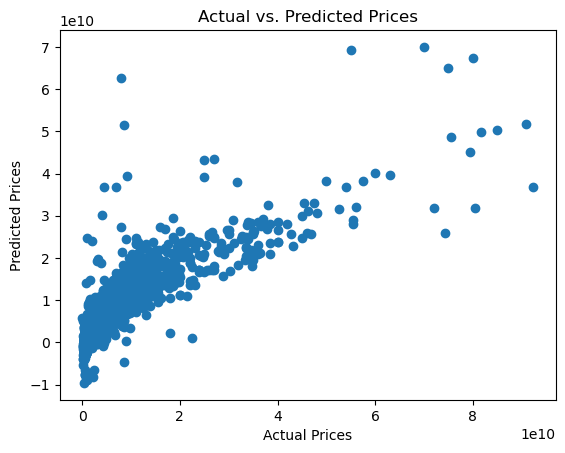

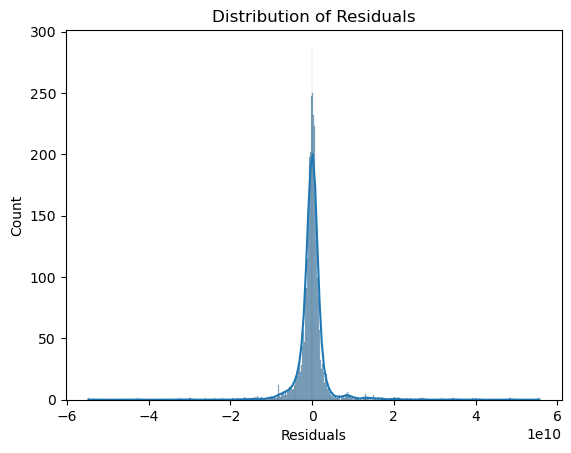

In [49]:
y_pred = regr.predict(X)
plt.scatter(y, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

residuals = y - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()
